状態空間
$$
\mathcal{S} = \left\{ s^{(1)}, s^{(2)}, s^{(3)}, s^{(4)} \right\}
$$
行動空間
$$
\mathcal{A} = \left\{ L, R \right\}
$$
報酬関数
$$
R(s,a,s') = \begin{cases}
  1 & (s' = s^{4}) \\
  0 & (otherwise)
\end{cases}
$$
状態遷移関数
$$
P_{T} \left( s^{(i)}| s^{(i+1)}, R \right) = 0.9 (i=1,2,3)\\
P_{T} \left( s^{(i)}| s^{(i)}, R \right) = 0.1 (i=1,2,3)\\
P_{T} \left( s^{(4)}| s^{(4)}, R \right) = 0.9 \\
P_{T} \left( s^{(4)}| s^{(3)}, R \right) = 0.1 \\
P_{T} \left( s^{(i)}| s^{(i-1)}, L \right) = 0.9 (i=2,3,4)\\
P_{T} \left( s^{(i)}| s^{(i)}, L \right) = 0.1 (i=2,3,4)\\
P_{T} \left( s^{(1)}| s^{(1)}, L \right) = 0.9 \\
P_{T} \left( s^{(1)}| s^{(2)}, L \right) = 0.1
$$

割引率
$$
\gamma = 0.9
$$
状態・行動価値関数
$$
Q^{\pi}\left(s,a\right) = \mathbb{E}_{\pi, P_{T}} \left [ \sum^{\infty}_{t=0} \gamma^t R(s_{t}, a_{t}, s_{t+1}) | s_{0}=s, a_{0}=a \right]
$$

In [1]:
from graphviz import Digraph
from IPython.display import Image

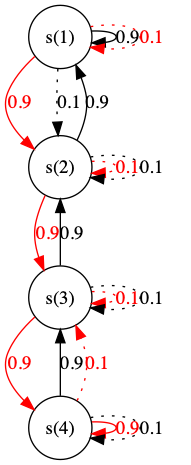

In [2]:
G = Digraph(format='png')
G.attr('node', shape='circle')
G.edge('s(1)', 's(2)', label="0.9", color="red", fontcolor="red")
G.edge('s(2)', 's(3)', label="0.9", color="red", fontcolor="red")
G.edge('s(3)', 's(4)', label="0.9", color="red", fontcolor="red")
G.edge('s(4)', 's(4)', label="0.9", color="red", fontcolor="red")
G.edge('s(2)', 's(1)', label="0.9")
G.edge('s(3)', 's(2)', label="0.9")
G.edge('s(4)', 's(3)', label="0.9")
G.edge('s(1)', 's(1)', label="0.9")
G.edge('s(1)', 's(1)', label='0.1', style='dotted', color="red", fontcolor="red")
G.edge('s(2)', 's(2)', label='0.1', style='dotted', color="red", fontcolor="red")
G.edge('s(3)', 's(3)', label='0.1', style='dotted', color="red", fontcolor="red")
G.edge('s(4)', 's(3)', label='0.1', style='dotted', color="red", fontcolor="red")
G.edge('s(1)', 's(2)', label='0.1', style='dotted')
G.edge('s(2)', 's(2)', label='0.1', style='dotted')
G.edge('s(3)', 's(3)', label='0.1', style='dotted')
G.edge('s(4)', 's(4)', label='0.1', style='dotted')
Image(G.render('chainwalk'))

In [3]:
import numpy as np

In [4]:
# Pt(s | t, L)
Pt_L = np.matrix([
    [0.9, 0.1, 0, 0], # s = s1
    [0.9, 0.1, 0, 0], # s = s2
    [0, 0.9, 0.1, 0], # s = s3
    [0, 0, 0.9, 0.1] # s = s4    
])
# Pt(s | t, R)
Pt_R = np.matrix([
    [0.1, 0.9, 0, 0], # s = s1
    [0, 0.1, 0.9, 0], # s = s2
    [0, 0, 0.1, 0.9], # s = s3
    [0, 0, 0.1, 0.9] # s = s4    
])
R = np.matrix([0, 0, 0, 1])
discount = 0.9

## パターン1
$$
政策\pi_{1} = \begin{cases}
  0.5 & (a=L) \\
  0.5 & (a=R)
\end{cases}
$$

In [5]:
policy = np.array([0.5, 0.5])

In [6]:
p_sum = 0
Pt = Pt_L * policy[0] + Pt_R * policy[1]
for t in range(100):
    p_sum += discount ** t * Pt ** t * R.T

In [7]:
print('L: ', Pt_L * p_sum)
print('R: ', Pt_R * p_sum)

L:  [[1.46032168]
 [1.46032168]
 [1.82091047]
 [2.63112231]]
R:  [[1.71430161]
 [2.41980141]
 [3.72279858]
 [3.72279858]]


$Q^{\pi_{1}}(s,a)$のルックアップテーブル

|s|L|R|
|:--:|:--:|:--:|
|1|1.46032168|1.71430161|
|2|1.46032168|2.41980141|
|3|1.82091047|3.72279858|
|4|2.63112231|3.72279858|


## パターン2
$$
政策\pi_{2} = \begin{cases}
  0.1 & (a=L) \\
  0.9 & (a=R)
\end{cases}
$$

In [8]:
policy = np.array([0.1, 0.9])

In [9]:
p_sum = 0
Pt = Pt_L * policy[0] + Pt_R * policy[1]
for t in range(100):
    p_sum += discount ** t * Pt ** t * R.T

In [10]:
print('L: ', Pt_L * p_sum)
print('R: ', Pt_R * p_sum)

L:  [[5.55186961]
 [5.55186961]
 [6.3134721 ]
 [7.26416932]]
R:  [[6.14567519]
 [7.06204183]
 [8.13261952]
 [8.13261952]]


$Q^{\pi_{2}}(s,a)$のルックアップテーブル

|s|L|R|
|:--:|:--:|:--:|
|1|5.55186961|6.14567519|
|2|5.55186961|7.06204183|
|3|6.3134721|8.13261952|
|4|7.26416932|8.13261952|